## Ejercicio: represión y activación mutua
Modelen el comportamiento de un circuito donde:
1. $x$ y $y$ se activan mutuamente 
2. $x$ y $y$ se reprimen mutuamente 

``Consideren únicamente la dinámica de las proteínas, y usen las mismas tasas de degradación y producción para ambos genes.``

### Preguntas
Qué pasa si no hay $x$ ni $y$ al inicio? 

Qué pasa si hay más de una proteína que de la otra?

Las ecuaciones que describen represion y activacion de una proteina por un represor $R$ o un activador $A$, respectivamente, son:
\begin{align}
\frac{dp}{dt} = \beta_p\frac{1}{1 + (\frac{R}{K})^n} - \gamma_p p
\end{align}

\begin{align}
\frac{dp}{dt} = \beta_p \frac{[A]^n}{K^n + [A]^n}  - \gamma_p p
\end{align}


(0, 200)

/Users/porfirio/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


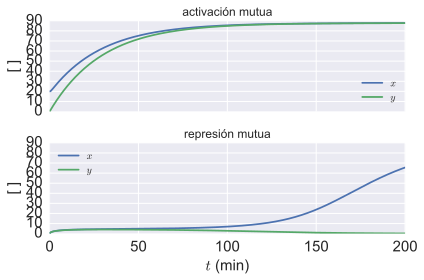

In [100]:
# parametros
beta = beta_p
gamma = gamma_p

def activacion_mutua(p0, t):
    """
    Ecuaciones de un circuito donde x y y se activan mutuamente
    """
    x, y = p0
    dx_dt = (beta * y**n) / (k**n + y**n) - gamma * x
    dy_dt = (beta * x**n) / (k**n + x**n) - gamma * y
    return dx_dt, dy_dt

def represion_mutua(p0, t):
    """
    Ecuaciones de un circuito donde x y y se reprimen mutuamente
    """
    x, y = p0
    dx_dt = beta / (1 + (y/k)**n) - gamma * x
    dy_dt = beta / (1 + (x/k)**n) - gamma * y
    return dx_dt, dy_dt

# condiciones iniciales
p0_act = (20,0)
p0_rep = (0.01,0)
# activacion mutua
x_act, y_act = odeint(activacion_mutua, p0_act, t).T
# represion mutua
x_rep, y_rep = odeint(represion_mutua, p0_rep, t).T

fig, axes = plt.subplots(2, sharex=True)
axes[0].set_title('activación mutua')
axes[0].plot(t,x_act, label='$x$')
axes[0].plot(t,y_act, label='$y$')
axes[1].set_title('represión mutua')
axes[1].plot(t,x_rep, label='$x$')
axes[1].plot(t,y_rep, label='$y$')
axes[0].legend(loc=4)
axes[1].legend(loc=2)
for ax in axes: ax.set_ylabel('[ ]')
axes[1].set_xlabel('$t$ (min)')
plt.xlim(0,200)